In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv("csv/penguins_size.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**Obiettivo**: creare un algoritmo capace di imparare a classificare le diverse specie di pinguini a partire dalle caratteristiche di un pinguino, usando il machine learning supervisionato

La variabile **target** è la specie presente nella colonna `species`. Questa variabile è di tipo *qualitativo* quindi l'algoritmo è un **classificatore**.

## Preparazione e pulitura dei dati

In [39]:
target = ["species"]
features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]

In [40]:
useful_data = data[features+target].dropna()
useful_data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie


In [41]:
useful_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   species            342 non-null    object 
dtypes: float64(4), object(1)
memory usage: 16.0+ KB


In questa fase di preparazione dobbiamo anche trasformare le feature qualitative in feature numeriche. In questo caso non è necessario

Eseguiamo l'analisi grafica dei dati

In [44]:
np.unique(useful_data[target])

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [45]:
species_color = {"Adelie":"red", "Chinstrap":"yellow", "Gentoo":"blue"}
species_color.keys()

dict_keys(['Adelie', 'Chinstrap', 'Gentoo'])

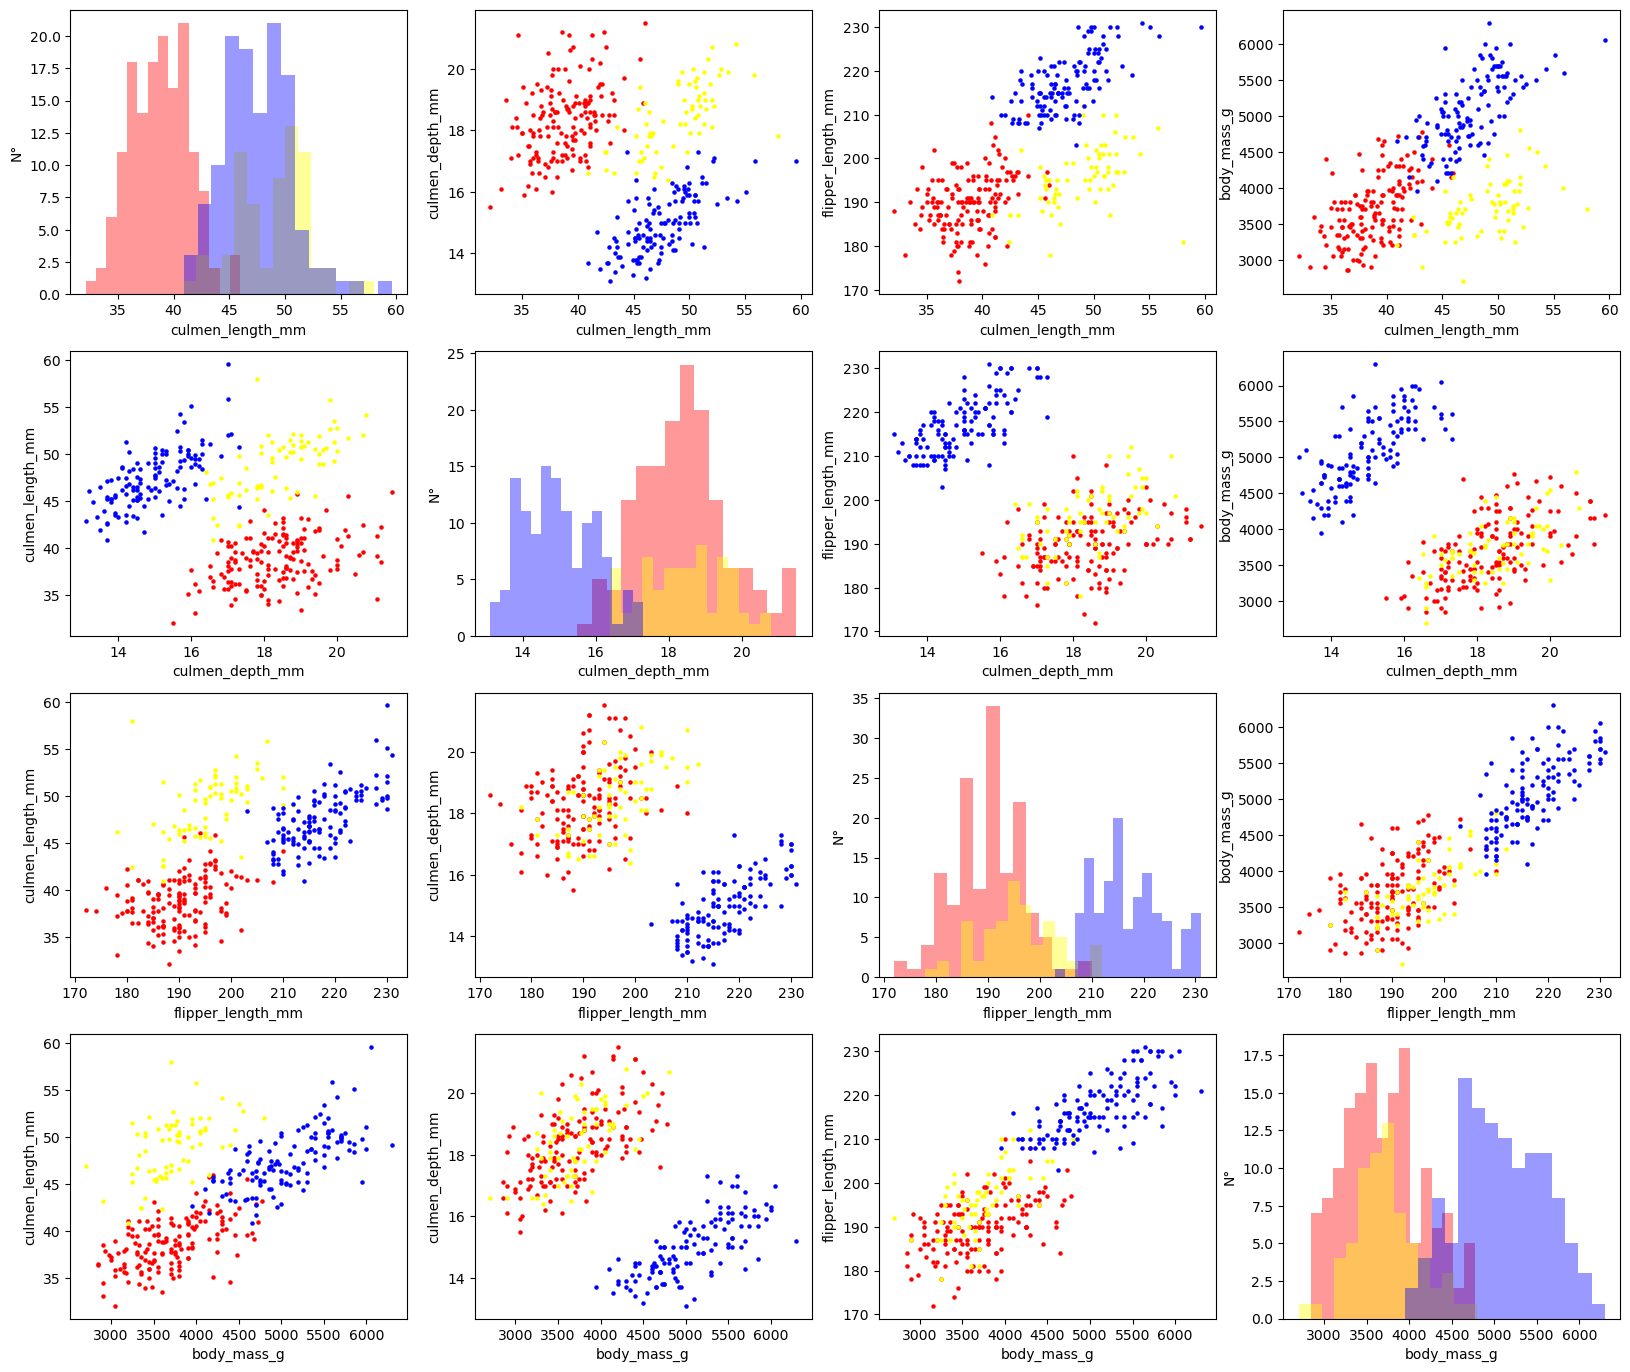

In [46]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 17))
for i, f_i in enumerate(features):
    for j, f_j in enumerate(features):
        if i != j:
            for sp in species_color:
                filt = useful_data["species"] == sp #seleziono la specie
                axs[i, j].scatter(useful_data[filt][f_i], useful_data[filt][f_j], 
                                  s=5, c=species_color[sp])
            axs[i, j].set_xlabel(f_i)
            axs[i, j].set_ylabel(f_j)
        else:
            for sp in species_color:
                filt = useful_data["species"] == sp #seleziono la specie
                axs[i, j].hist(useful_data[filt][f_i], bins=15, 
                               color=species_color[sp], alpha=0.4)
            axs[i, j].set_xlabel(f_i)
            axs[i, j].set_ylabel("N°")

## Suddivisione dei dati in training set e test set

In [48]:
from sklearn.model_selection import train_test_split 

In [49]:
X = useful_data[features] # datin in input: feature
y = useful_data[target] #variabile target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
22,35.9,19.2,189.0,3800.0
5,39.3,20.6,190.0,3650.0
91,41.1,18.1,205.0,4300.0
224,47.6,14.5,215.0,5400.0
331,49.8,15.9,229.0,5950.0
...,...,...,...,...
84,37.3,17.8,191.0,3350.0
18,34.4,18.4,184.0,3325.0
231,49.0,16.1,216.0,5550.0
99,43.2,18.5,192.0,4100.0


Dovremmo fare la procedura di **normalizzazione** anche detta **standardizzazione**, delle feature, per riportare i valori di tutte le feature entro un range comune, per esempio $\in[-1,1]$

La faremo successivamente 

## Scelta del modello

In [53]:
from sklearn.neural_network import MLPClassifier # MLP: multi-layer perceptron

In [54]:
model = MLPClassifier(hidden_layer_sizes=(10,10))
# layer input: ricavato in base a numero di feature
# layer nascosti è un parametro
# layer output: in base al numero di categorie possibili (adelie, gentoo e chipstrap)


## Addestramento

In [56]:
model.fit(X_train, y_train.to_numpy().ravel())

MLPClassifier(hidden_layer_sizes=(10, 10))

In [57]:
model.score(X_test, y_test) # restituisce l'accuratezza: 
# % di pinguini guessati correttamente

0.5145631067961165

## Rifacciamo parte della procedura di addestramento partendo però dalla normalizzazione delle feature che prima non abbiamo eseguito

In [59]:
X = useful_data[features]
y = useful_data[target]

Normalizziamo `X`

In [61]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [62]:
feature_scaler = StandardScaler()
X_norm = feature_scaler.fit_transform(X) # stiamo operando su un dataframe 
X_norm

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

In [63]:
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y.to_numpy().ravel())
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## Suddivisione dei dati in training set e test set

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_encoded, test_size=0.3, random_state=42)

## Scelta del modello

In [67]:
from sklearn.neural_network import MLPClassifier
# overfitting: se la rete neurale ha troppi percettroni, impara gli esempi 
# a memoria e non è in grado di generalizzare

## Addestramento

In [69]:
iters = np.arange(10, 1000, 50)
train_acc = []
test_acc = []
for i in iters:
    model = MLPClassifier(hidden_layer_sizes=(3,7,4), random_state=987, max_iter=i, solver="adam")
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))
print(test_acc[-1])

C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\neural_network\_mu

0.9805825242718447


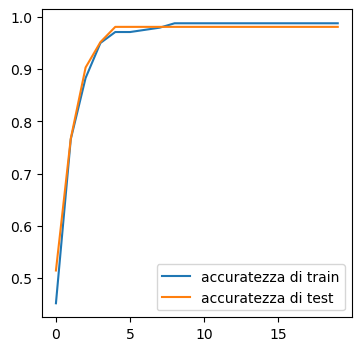

In [70]:
fig, ax = plt.subplots(figsize=(4,4))

ax.plot(train_acc, label="accuratezza di train")
ax.plot(test_acc, label="accuratezza di test")
ax.legend()

plt.show()

## Valutazione del modello

In [72]:
# accuratezza sui dati di test
model.score(X_test, y_test)

0.9805825242718447

In [73]:
#accuratezza sui dati di training
model.score(X_train, y_train)

0.9874476987447699

In [74]:
pinguino_test = [[38, 15.6, 205.0, 3780.0]] # mondo feature reali

specie_num = model.predict(feature_scaler.transform(pinguino_test))

target_encoder.inverse_transform([specie_num])

C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Utente\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['Adelie'], dtype=object)